In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset

nc_file = '../cloud_results.nc'

# Show all variables
with Dataset(nc_file, 'r') as dataset:
    for var in dataset.variables:
        print(f"shape of {var}: {dataset.variables[var].shape}")

shape of size: (1000, 3)
shape of max_height: (1000, 3)
shape of cloud_base_area: (1000, 3)
shape of max_w: (1000, 3)
shape of max_w_cloud_base: (1000, 3)
shape of surface_area: (1000, 3)
shape of ql_flux: (1000, 3)
shape of mass_flux: (1000, 3)
shape of mass_flux_per_level: (1000, 3, 160)
shape of temp_per_level: (1000, 3, 160)
shape of theta_outside_per_level: (1000, 3, 160)
shape of w_per_level: (1000, 3, 160)
shape of circum_per_level: (1000, 3, 160)
shape of eff_radius_per_level: (1000, 3, 160)
shape of location_x: (1000, 3)
shape of location_y: (1000, 3)
shape of location_z: (1000, 3)
shape of cloud_points: (1000, 3, 10000, 3)
shape of age: (1000, 3)
shape of height: (160,)


# Mass Flux

Vertical distribution of mass flux

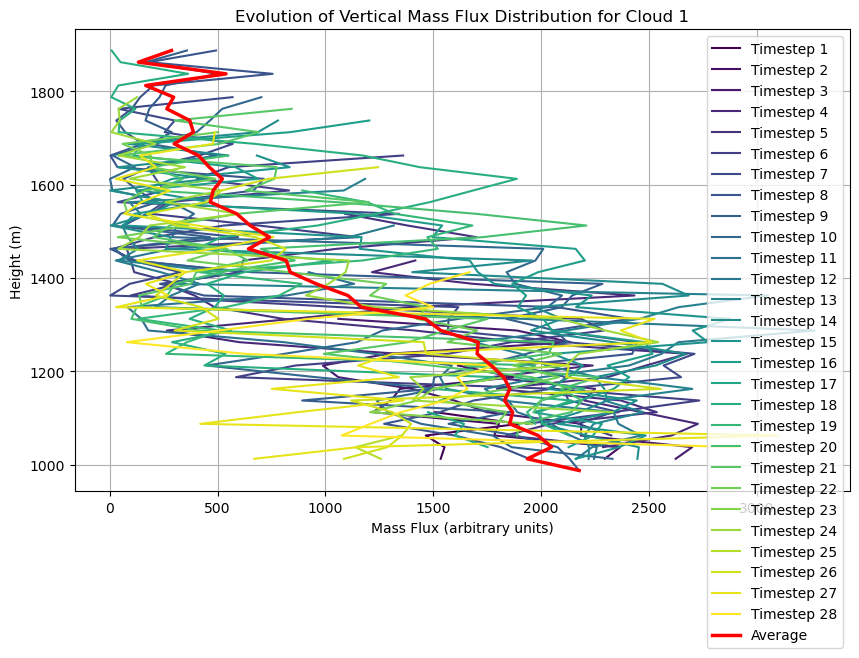

In [2]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

dataset = Dataset(nc_file, 'r')

# Select a specific cloud track to visualize
cloud_index = 0 # Set the index of the cloud you want to visualize

# Read the mass flux per level data for the specific cloud track
mass_flux_per_level = dataset.variables['mass_flux_per_level'][cloud_index, :, :].T  # Transpose to get shape (levels, timesteps)

# Read the height levels to use as the y-axis
heights = dataset.variables['height'][:]

# Number of timesteps for this specific cloud
num_timesteps = mass_flux_per_level.shape[1]

# Set up the figure and axes for plotting
plt.figure(figsize=(10, 6))

# Generate a color map for the different timesteps
colors = cm.viridis(np.linspace(0, 1, num_timesteps))

# Plot mass flux distribution for each timestep
for timestep in range(num_timesteps):
    if not np.all(np.isnan(mass_flux_per_level[:, timestep])):  # Check if there's data for this timestep
        plt.plot(mass_flux_per_level[:, timestep], heights, label=f'Timestep {timestep+1}', color=colors[timestep])

# Calculate and plot the average mass flux per level across all timesteps
average_mass_flux = np.nanmean(mass_flux_per_level, axis=1)
plt.plot(average_mass_flux, heights, label='Average', color='red', linewidth=2.5)

plt.xlabel('Mass Flux (arbitrary units)')
plt.ylabel('Height (m)')
plt.title(f'Evolution of Vertical Mass Flux Distribution for Cloud {cloud_index+1}')
plt.grid(True)
plt.legend()
plt.show()

dataset.close()


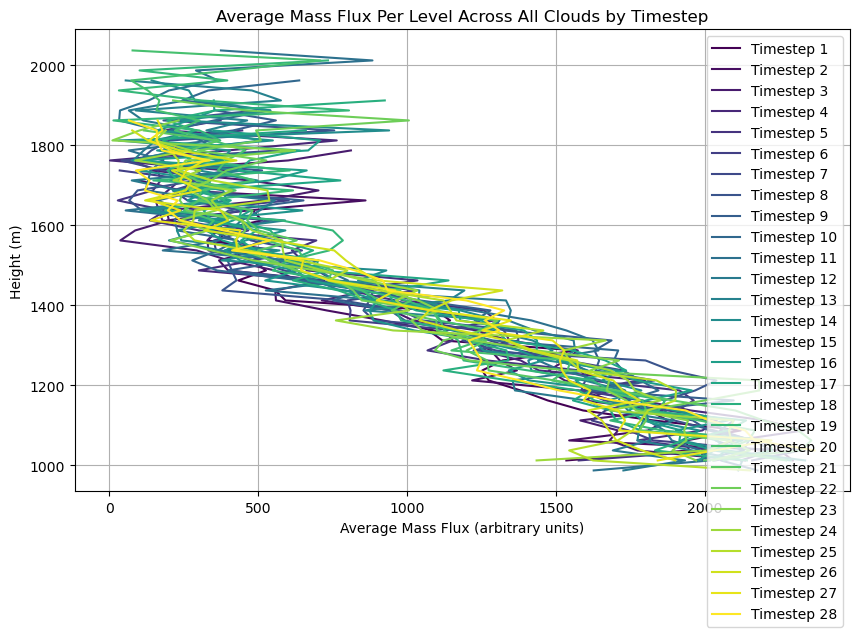

In [3]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Load the NetCDF file
nc_file = '../cloud_results.nc'  # Replace with the actual path to your NetCDF file
dataset = Dataset(nc_file, 'r')

# Read mass flux per level for all clouds and timesteps
mass_flux_per_level_all = dataset.variables['mass_flux_per_level'][:]

# Read the height levels to use as the y-axis
heights = dataset.variables['height'][:]

# Number of timesteps and number of tracks (clouds)
num_timesteps = mass_flux_per_level_all.shape[1]
num_tracks = mass_flux_per_level_all.shape[0]

# Set up the figure and axes for plotting
plt.figure(figsize=(10, 6))

# Generate a color map for the different timesteps
colors = cm.viridis(np.linspace(0, 1, num_timesteps))

# Loop through each timestep to calculate and plot the average mass flux per level across all clouds
for timestep in range(num_timesteps):
    # Extract data for the current timestep from all tracks
    mass_flux_at_timestep = mass_flux_per_level_all[:, timestep, :]

    # Calculate the average across all tracks (clouds) for this timestep, ignoring NaNs
    average_mass_flux_at_timestep = np.nanmean(mass_flux_at_timestep, axis=0)

    # Plot this average mass flux against height levels
    plt.plot(average_mass_flux_at_timestep, heights, label=f'Timestep {timestep+1}', color=colors[timestep])

plt.xlabel('Average Mass Flux (arbitrary units)')
plt.ylabel('Height (m)')
plt.title('Average Mass Flux Per Level Across All Clouds by Timestep')
plt.grid(True)
plt.legend()
plt.show()

dataset.close()


# Temperature

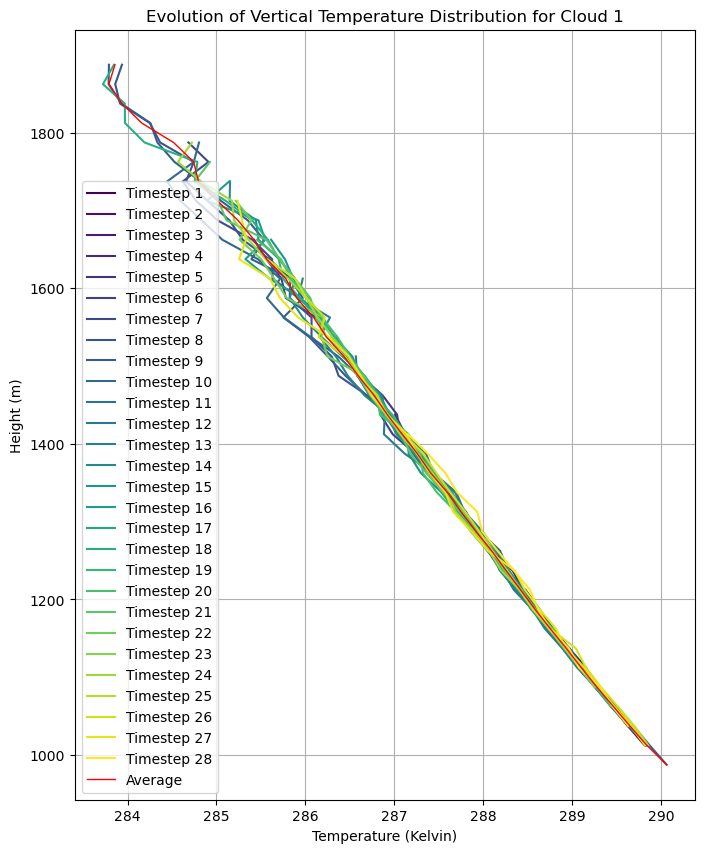

In [4]:

# Load the NetCDF file
nc_file = '../cloud_results.nc'  # Update this path
dataset = Dataset(nc_file, 'r')

# Select a specific cloud track to visualize
cloud_index = 0 # Set the index of the cloud you want to visualize

# Read the temp per level data for the specific cloud track
temp_per_level = dataset.variables['temp_per_level'][cloud_index, :, :].T  # Transpose to get shape (levels, timesteps)

# Read the height levels to use as the y-axis
heights = dataset.variables['height'][:]

# Number of timesteps for this specific cloud
num_timesteps = temp_per_level.shape[1]

# Set up the figure and axes for plotting
plt.figure(figsize=(8, 10))

# Generate a color map for the different timesteps
colors = cm.viridis(np.linspace(0, 1, num_timesteps))

# Plot temperature distribution for each timestep
for timestep in range(num_timesteps):
    if not np.all(np.isnan(temp_per_level[:, timestep])):  # Check if there's data for this timestep
        plt.plot(temp_per_level[:, timestep], heights, label=f'Timestep {timestep+1}', color=colors[timestep])

# Calculate and plot the average temperature per level across all timesteps
average_temp = np.nanmean(temp_per_level, axis=1)
plt.plot(average_temp, heights, label='Average', color='red', linewidth=1)

plt.xlabel('Temperature (Kelvin)')
plt.ylabel('Height (m)')
plt.title(f'Evolution of Vertical Temperature Distribution for Cloud {cloud_index+1}')
plt.grid(True)
plt.legend()
plt.show()

dataset.close()


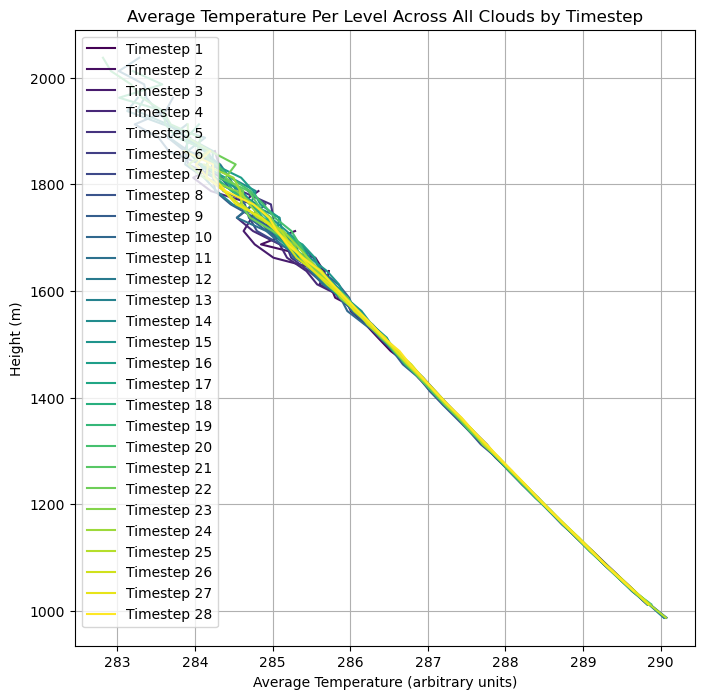

In [5]:

# Load the NetCDF file
nc_file = '../cloud_results.nc'  # Replace with the actual path to your NetCDF file
dataset = Dataset(nc_file, 'r')

# Read temperature per level for all clouds and timesteps
temp_per_level_all = dataset.variables['temp_per_level'][:]

# Read the height levels to use as the y-axis
heights = dataset.variables['height'][:]

# Number of timesteps and number of tracks (clouds)
num_timesteps = temp_per_level_all.shape[1]
num_tracks = temp_per_level_all.shape[0]

# Set up the figure and axes for plotting
plt.figure(figsize=(8, 8))

# Generate a color map for the different timesteps
colors = cm.viridis(np.linspace(0, 1, num_timesteps))

# Loop through each timestep to calculate and plot the average temperature per level across all clouds
for timestep in range(num_timesteps):
    # Extract data for the current timestep from all tracks
    temp_at_timestep = temp_per_level_all[:, timestep, :]

    # Calculate the average across all tracks (clouds) for this timestep, ignoring NaNs
    average_temp_at_timestep = np.nanmean(temp_at_timestep, axis=0)

    # Plot this average temperature against height levels
    plt.plot(average_temp_at_timestep, heights, label=f'Timestep {timestep+1}', color=colors[timestep])

plt.xlabel('Average Temperature (arbitrary units)')
plt.ylabel('Height (m)')
plt.title('Average Temperature Per Level Across All Clouds by Timestep')
plt.grid(True)
plt.legend()
plt.show()

dataset.close()


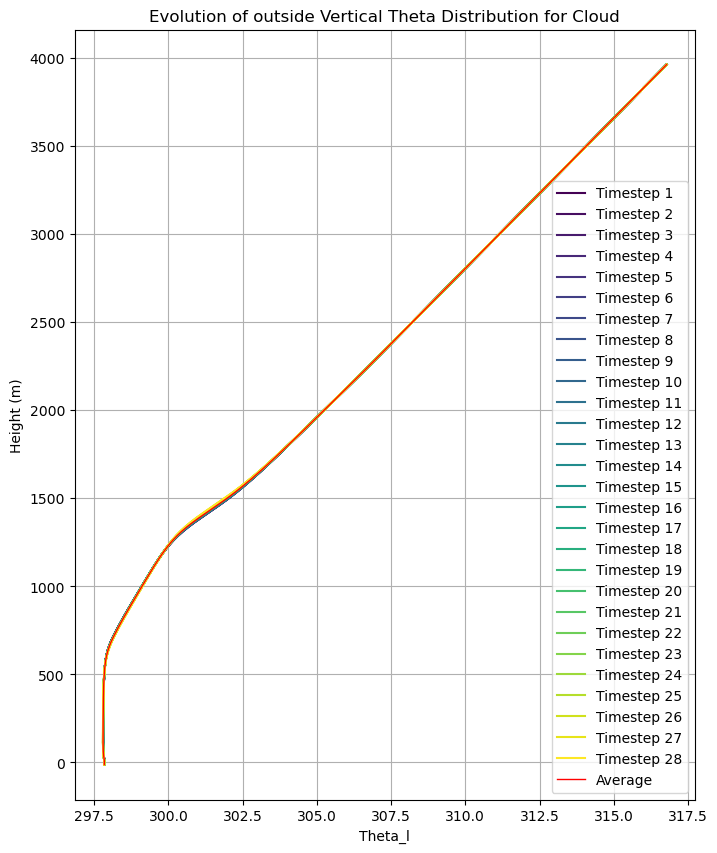

In [6]:

# Load the NetCDF file
nc_file = '../cloud_results.nc'  # Update this path
dataset = Dataset(nc_file, 'r')

# Select a specific cloud track to visualize
cloud_index = 0 # Set the index of the cloud you want to visualize

# Read the temp per level data for the specific cloud track
temp_per_level = dataset.variables['theta_outside_per_level'][cloud_index, :, :].T  # Transpose to get shape (levels, timesteps)

# Read the height levels to use as the y-axis
heights = dataset.variables['height'][:]

# Number of timesteps for this specific cloud
num_timesteps = temp_per_level.shape[1]

# Set up the figure and axes for plotting
plt.figure(figsize=(8, 10))

# Generate a color map for the different timesteps
colors = cm.viridis(np.linspace(0, 1, num_timesteps))

# Plot temperature distribution for each timestep
for timestep in range(num_timesteps):
    if not np.all(np.isnan(temp_per_level[:, timestep])):  # Check if there's data for this timestep
        plt.plot(temp_per_level[:, timestep], heights, label=f'Timestep {timestep+1}', color=colors[timestep])

# Calculate and plot the average temperature per level across all timesteps
average_temp = np.nanmean(temp_per_level, axis=1)
plt.plot(average_temp, heights, label='Average', color='red', linewidth=1)

plt.xlabel('Theta_l')
plt.ylabel('Height (m)')
plt.title(f'Evolution of outside Vertical Theta Distribution for Cloud')
plt.grid(True)
plt.legend()
plt.show()

dataset.close()


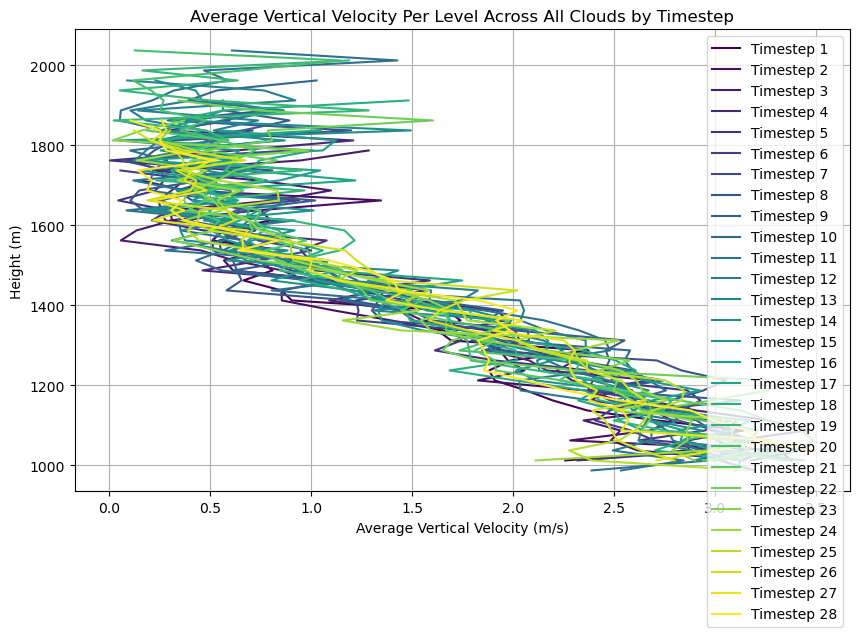

In [7]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Load the NetCDF file
nc_file = '../cloud_results.nc'  # Replace with the actual path to your NetCDF file
dataset = Dataset(nc_file, 'r')

# Read vertical velocity per level for all clouds and timesteps
w_per_level_all = dataset.variables['w_per_level'][:]

# Read the height levels to use as the y-axis
heights = dataset.variables['height'][:]

# Number of timesteps and number of tracks (clouds)
num_timesteps = w_per_level_all.shape[1]
num_tracks = w_per_level_all.shape[0]

# Set up the figure and axes for plotting
plt.figure(figsize=(10, 6))

# Generate a color map for the different timesteps
colors = cm.viridis(np.linspace(0, 1, num_timesteps))

# Loop through each timestep to calculate and plot the average vertical velocity per level across all clouds
for timestep in range(num_timesteps):
    # Extract data for the current timestep from all tracks
    w_at_timestep = w_per_level_all[:, timestep, :]

    # Calculate the average across all tracks (clouds) for this timestep, ignoring NaNs
    average_w_at_timestep = np.nanmean(w_at_timestep, axis=0)

    # Plot this average vertical velocity against height levels
    plt.plot(average_w_at_timestep, heights, label=f'Timestep {timestep+1}', color=colors[timestep])

plt.xlabel('Average Vertical Velocity (m/s)')
plt.ylabel('Height (m)')
plt.title('Average Vertical Velocity Per Level Across All Clouds by Timestep')
plt.grid(True)
plt.legend()
plt.show()

dataset.close()


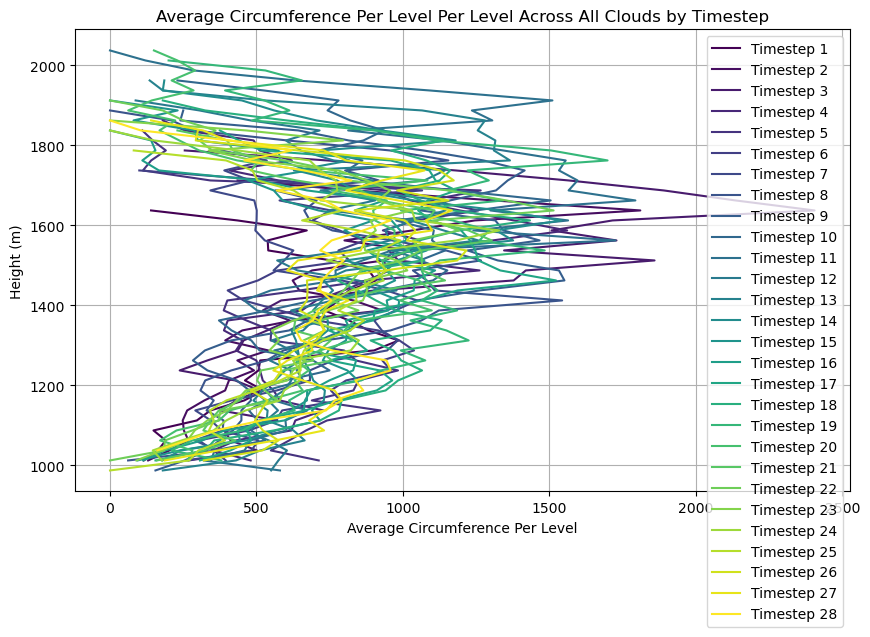

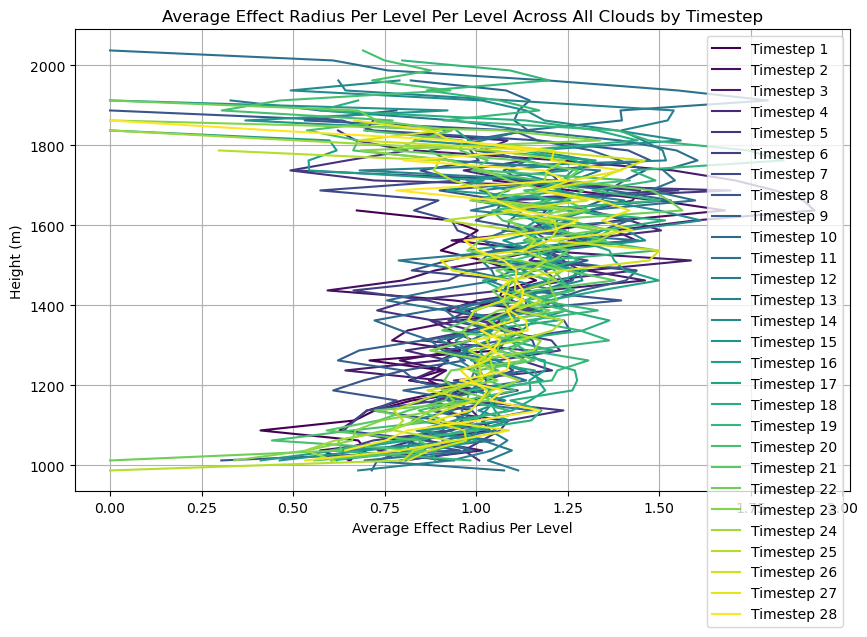

In [8]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Load the NetCDF file
nc_file = '../cloud_results.nc'  # Replace with the actual path to your NetCDF file
dataset = Dataset(nc_file, 'r')

# Read circum_per_level and effect_radius_per_level for all clouds and timesteps
circum_per_level_all = dataset.variables['circum_per_level'][:]
effect_radius_per_level_all = dataset.variables['eff_radius_per_level'][:]

# Read the height levels to use as the y-axis
heights = dataset.variables['height'][:]

# Number of timesteps and number of tracks (clouds)
num_timesteps = circum_per_level_all.shape[1]
num_tracks = circum_per_level_all.shape[0]

# Function to plot the data
def plot_variable(variable_data, variable_name, ylabel):
    plt.figure(figsize=(10, 6))

    # Generate a color map for the different timesteps
    colors = cm.viridis(np.linspace(0, 1, num_timesteps))

    # Loop through each timestep to calculate and plot the average of the variable per level across all clouds
    for timestep in range(num_timesteps):
        # Extract data for the current timestep from all tracks
        data_at_timestep = variable_data[:, timestep, :]

        # Calculate the average across all tracks (clouds) for this timestep, ignoring NaNs
        average_data_at_timestep = np.nanmean(data_at_timestep, axis=0)

        # Plot this average against height levels
        plt.plot(average_data_at_timestep, heights, label=f'Timestep {timestep+1}', color=colors[timestep])

    plt.xlabel(f'Average {variable_name}')
    plt.ylabel(ylabel)
    plt.title(f'Average {variable_name} Per Level Across All Clouds by Timestep')
    plt.grid(True)
    plt.legend()
    plt.show()

# Plot circum_per_level
plot_variable(circum_per_level_all, 'Circumference Per Level', 'Height (m)')

# Plot effect_radius_per_level
plot_variable(effect_radius_per_level_all, 'Effect Radius Per Level', 'Height (m)')

dataset.close()


KeyboardInterrupt: 

# Lifetime
## Effective cloud radius

In [2]:
# First, display available cloud tracks
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset
import math

# Open the dataset
nc_file = '../cloud_results.nc'
dataset = Dataset(nc_file, 'r')

# Find and list valid cloud tracks
valid_tracks = []
track_count = dataset.dimensions['track'].size

print("Available cloud tracks:")
print("-" * 50)
for track_idx in range(track_count):
    # Check if this track has any valid data
    size_data = dataset.variables['size'][track_idx, :]
    valid_timesteps = np.where(~np.isnan(size_data))[0]
    
    if len(valid_timesteps) > 0:  # If track has data
        max_height = np.nanmax(dataset.variables['max_height'][track_idx, :])
        lifetime = len(valid_timesteps)
        valid_tracks.append(track_idx)
        print(f"Cloud {track_idx}: Max Height={max_height:.0f}m, Lifetime={lifetime} timesteps")

print("-" * 50)
print(f"Found {len(valid_tracks)} valid cloud tracks")

Available cloud tracks:
--------------------------------------------------
Cloud 0: Max Height=1388m, Lifetime=3 timesteps
Cloud 1: Max Height=1112m, Lifetime=3 timesteps
Cloud 2: Max Height=1788m, Lifetime=3 timesteps
Cloud 3: Max Height=1138m, Lifetime=3 timesteps
Cloud 4: Max Height=1612m, Lifetime=3 timesteps
Cloud 5: Max Height=1238m, Lifetime=3 timesteps
Cloud 6: Max Height=1488m, Lifetime=3 timesteps
Cloud 7: Max Height=1362m, Lifetime=3 timesteps
Cloud 8: Max Height=1288m, Lifetime=3 timesteps
Cloud 9: Max Height=1138m, Lifetime=3 timesteps
Cloud 10: Max Height=1512m, Lifetime=3 timesteps
Cloud 11: Max Height=1238m, Lifetime=3 timesteps
Cloud 12: Max Height=1162m, Lifetime=3 timesteps
Cloud 13: Max Height=1212m, Lifetime=3 timesteps
Cloud 14: Max Height=1088m, Lifetime=3 timesteps
Cloud 15: Max Height=1388m, Lifetime=3 timesteps
Cloud 16: Max Height=1362m, Lifetime=3 timesteps
Cloud 17: Max Height=1088m, Lifetime=3 timesteps
Cloud 18: Max Height=1462m, Lifetime=3 timesteps
Clou

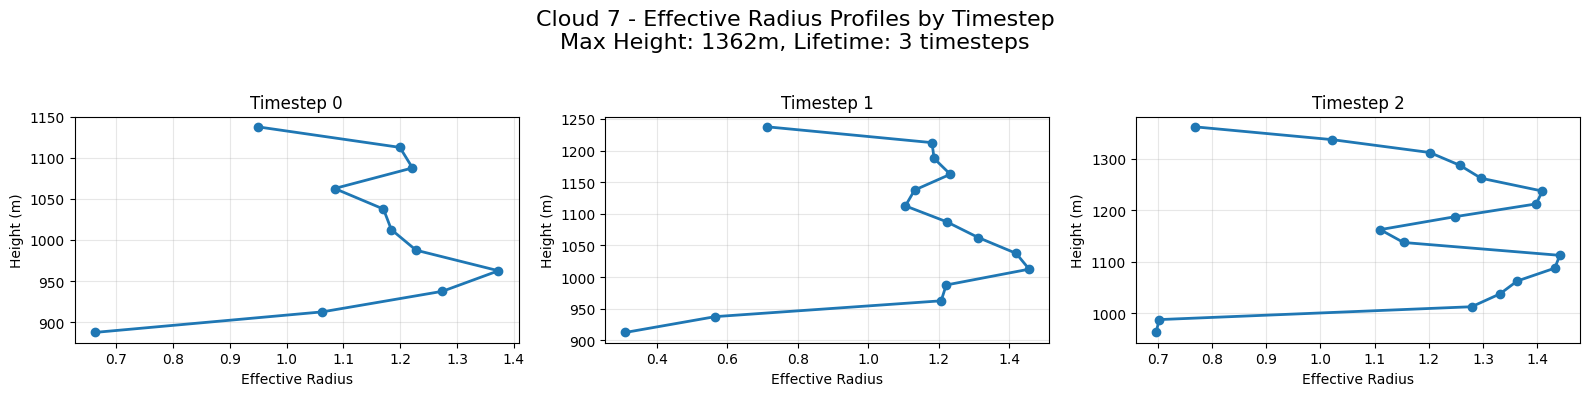

In [4]:
# Set the cloud index you want to analyze
cloud_idx = 7  # Change this to the cloud ID you want to visualize

# Get data for this cloud
eff_radius = dataset.variables['eff_radius_per_level'][cloud_idx, :, :].T  # (level, time)
heights = dataset.variables['height'][:]

# Find timesteps where this cloud exists
size_data = dataset.variables['size'][cloud_idx, :]
valid_timesteps = np.where(~np.isnan(size_data))[0]

if len(valid_timesteps) == 0:
    print("No data available for this cloud")
else:
    # Determine layout for subplots
    n_plots = len(valid_timesteps)
    cols = min(4, n_plots)  # Maximum 4 columns
    rows = math.ceil(n_plots / cols)  # Ceiling division
    
    # Create figure with subplots
    fig, axs = plt.subplots(rows, cols, figsize=(16, 4 * rows))
    
    # Handle case of single row or single column grid
    if rows == 1 and cols == 1:
        axs = np.array([[axs]])
    elif rows == 1:
        axs = axs.reshape(1, -1)
    elif cols == 1:
        axs = axs.reshape(-1, 1)
    
    # Plot effective radius for each timestep
    for i, timestep in enumerate(valid_timesteps):
        row = i // cols
        col = i % cols
        ax = axs[row, col]
        
        # Get effective radius data for this timestep
        er_profile = eff_radius[:, timestep]
        
        # Skip if all values are NaN
        if np.all(np.isnan(er_profile)):
            ax.text(0.5, 0.5, "No data", ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f"Timestep {timestep}")
            continue
        
        # Find where we have valid data
        valid_mask = ~np.isnan(er_profile)
        valid_heights = heights[valid_mask]
        valid_er = er_profile[valid_mask]
        
        # Plot
        ax.plot(valid_er, valid_heights, 'o-', linewidth=2)
        ax.set_xlabel('Effective Radius')
        ax.set_ylabel('Height (m)')
        ax.set_title(f"Timestep {timestep}")
        ax.grid(True, alpha=0.3)
    
    # Hide unused subplots
    for i in range(len(valid_timesteps), rows*cols):
        row = i // cols
        col = i % cols
        fig.delaxes(axs[row, col])
    
    # Add an overall title
    cloud_info = f"Cloud {cloud_idx} - Effective Radius Profiles by Timestep"
    max_height = np.nanmax(dataset.variables['max_height'][cloud_idx, :])
    lifetime = len(valid_timesteps)
    info_text = f"Max Height: {max_height:.0f}m, Lifetime: {lifetime} timesteps"
    fig.suptitle(f"{cloud_info}\n{info_text}", fontsize=16)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Make room for the suptitle
    plt.show()

# Importing data and filtering to remove partial lifetimes 

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset

nc_file = '../cloud_results.nc'

# Load dataset and create a mask of valid tracks
with Dataset(nc_file, 'r') as dataset:
    # Check if valid_track exists (in case you're using an older file)
    if 'valid_track' in dataset.variables:
        # Create mask of valid tracks (where valid_track == 1)
        valid_mask = dataset.variables['valid_track'][:] == 1
        num_valid = np.sum(valid_mask)
        num_total = len(valid_mask)
        print(f"Using {num_valid} valid tracks out of {num_total} total tracks ({num_valid/num_total*100:.1f}%)")
    else:
        print("Warning: 'valid_track' variable not found. Using all tracks.")
        valid_mask = np.ones(dataset.dimensions['track'].size, dtype=bool)
        
    # Example: Load data you want to analyze, filtering by valid tracks only
    # For variables with dimensions (track, time, ...)
    size = dataset.variables['size'][:][valid_mask, :]
    max_height = dataset.variables['max_height'][:][valid_mask, :]
    
    # For any other variable you want to analyze
    # Replace 'variable_name' with the actual variable name
    # my_var = dataset.variables['variable_name'][:][valid_mask, ...]

Using 963 valid tracks out of 1000 total tracks (96.3%)


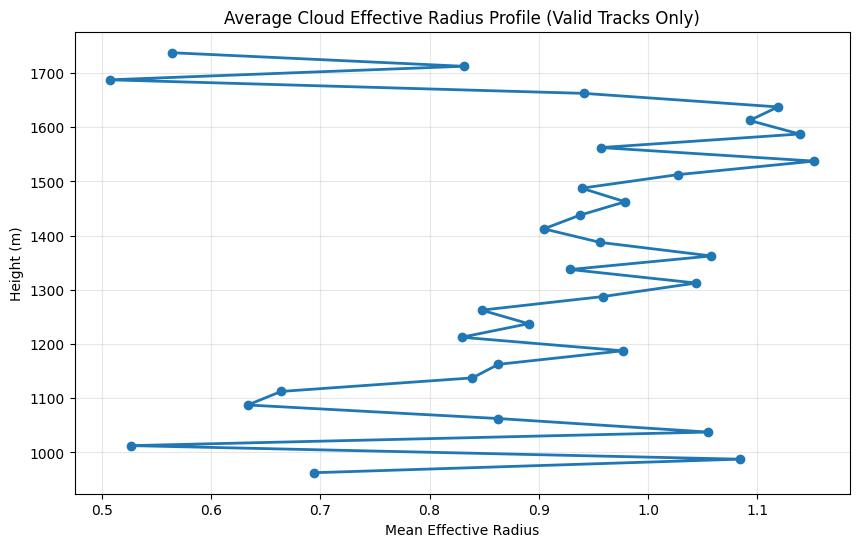

In [10]:
# Load all necessary data with the valid_mask filter
with Dataset(nc_file, 'r') as dataset:
    # Get valid tracks mask
    valid_mask = dataset.variables['valid_track'][:] == 1
    
    # Load filtered data
    eff_radius = dataset.variables['eff_radius_per_level'][:][valid_mask, :, :]  # (track, time, level)
    heights = dataset.variables['height'][:]
    
    # For example, to plot the mean effective radius profile across all valid tracks
    # First, find non-NaN values at each height level
    valid_data = ~np.isnan(eff_radius)
    
    # Calculate mean, ignoring NaN values
    mean_eff_radius = np.nanmean(eff_radius, axis=(0, 1))  # Average over tracks and time
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(mean_eff_radius, heights, 'o-', linewidth=2)
    plt.xlabel('Mean Effective Radius')
    plt.ylabel('Height (m)')
    plt.title('Average Cloud Effective Radius Profile (Valid Tracks Only)')
    plt.grid(True, alpha=0.3)

Using 963 complete-lifetime tracks out of 1000 total tracks


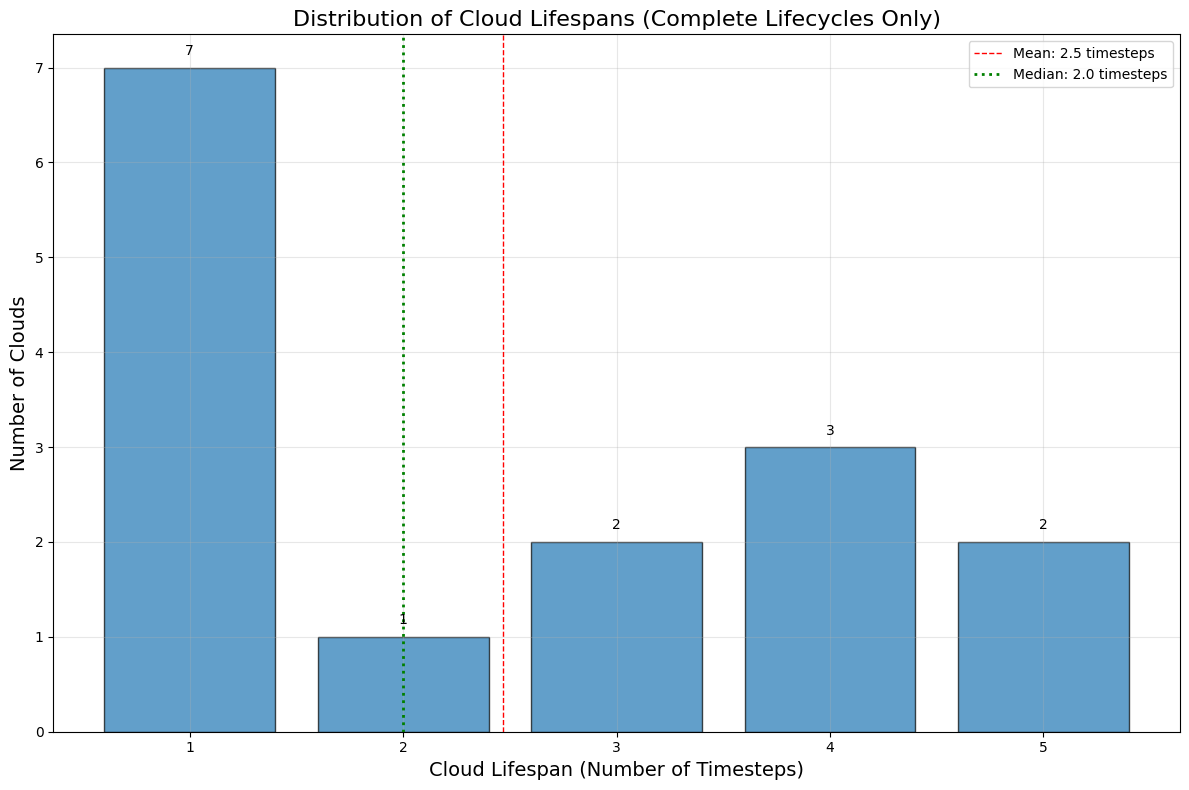

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset

nc_file = '../cloud_results.nc'  # Replace with the actual path to your NetCDF file

with Dataset(nc_file, 'r') as dataset:
    # Get valid tracks (complete lifetimes only)
    valid_tracks = dataset.variables['valid_track'][:] == 1
    print(f"Using {np.sum(valid_tracks)} complete-lifetime tracks out of {len(valid_tracks)} total tracks")
    
    # Read cloud ages for valid tracks
    age_data = dataset.variables['age'][:][valid_tracks, :]
    
    # Calculate cloud lifespans (how many timesteps each cloud lives)
    cloud_lifespans = []
    
    for track_idx in range(age_data.shape[0]):
        # Get ages for this track, ignoring missing values (-1)
        track_ages = age_data[track_idx, :]
        valid_ages = track_ages[track_ages >= 0]
        
        if len(valid_ages) > 0:
            # Maximum age + 1 = number of timesteps the cloud lived
            # (+1 because age starts at 0)
            lifespan = np.max(valid_ages) + 1
            cloud_lifespans.append(lifespan)
    
    cloud_lifespans = np.array(cloud_lifespans)

# Create the histogram
plt.figure(figsize=(12, 8))
max_lifespan = int(np.max(cloud_lifespans)) if len(cloud_lifespans) > 0 else 0
bins = range(1, max_lifespan + 2)  # +2 because range is exclusive and we want to include the max value

# Plot the histogram
if len(cloud_lifespans) > 0:
    counts, edges, _ = plt.hist(cloud_lifespans, bins=bins, align='left', alpha=0.7, 
                               edgecolor='black', rwidth=0.8)
    
    # Add count labels above each bar
    for i, count in enumerate(counts):
        if count > 0:  # Only add label if there are clouds with this lifespan
            plt.text(i + 1, count + 0.1, str(int(count)), 
                     horizontalalignment='center', verticalalignment='bottom')
    
    # Calculate statistics
    mean_lifespan = np.mean(cloud_lifespans)
    median_lifespan = np.median(cloud_lifespans)
    
    # Add statistics to the plot
    plt.axvline(mean_lifespan, color='red', linestyle='dashed', linewidth=1, 
               label=f'Mean: {mean_lifespan:.1f} timesteps')
    plt.axvline(median_lifespan, color='green', linestyle='dotted', linewidth=2, 
               label=f'Median: {median_lifespan:.1f} timesteps')
    
    plt.xlabel('Cloud Lifespan (Number of Timesteps)', fontsize=14)
    plt.ylabel('Number of Clouds', fontsize=14)
    plt.title('Distribution of Cloud Lifespans (Complete Lifecycles Only)', fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.xticks(range(1, max_lifespan + 1))
    plt.legend()
else:
    plt.text(0.5, 0.5, "No valid cloud data available", 
             horizontalalignment='center', verticalalignment='center', 
             transform=plt.gca().transAxes, fontsize=14)

plt.tight_layout()
plt.show()